In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection & Processing

In [4]:
heart_data=pd.read_csv("heart_data.csv")

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_data.shape

(303, 14)

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
 heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#checking the distribution of target variable
# 1- defective heart 0- normal heart 

In [13]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Standarization

In [14]:
from sklearn.preprocessing import StandardScaler
newdata=heart_data[["age","trestbps","chol","thalach"]]
scaler=StandardScaler()
scaler.fit(newdata)
newdata2=scaler.transform(newdata)
heart_data[["age","trestbps","chol","thalach"]]=newdata2
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


## Splitting Features & Target 

In [15]:
x=heart_data.drop(columns="target",axis=1).values
y=heart_data["target"]

In [16]:
#print(x)
# print(type(x.values))
print(type(x))

<class 'numpy.ndarray'>


In [17]:
#print(y)
print(type(y))

<class 'pandas.core.series.Series'>


## Splitting data into Training & Testing Data

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [19]:
print(x.shape,x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(303, 13) (242, 13) (61, 13) (61,) (242,)


In [20]:
print(type(x_train),type(y_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


## Data Standardization

### LOGISTIC REGRESSION

In [21]:
lr_classifier=LogisticRegression(max_iter=1000)
lr_classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### SVM

In [22]:
svc_classifier=svm.SVC(kernel="linear")
svc_classifier.fit(x_train,y_train)

SVC(kernel='linear')

### RANDOM FOREST

In [23]:
rfc_classifier=RandomForestClassifier()
rfc_classifier.fit(x_train,y_train)

RandomForestClassifier()

## Model Evaluation

### Using Test-Train Split

In [24]:
lr_classifier.score(x_test,y_test)
#this is calculate don test data here

0.8032786885245902

In [25]:
print("Accuracy on training data:")
models=[lr_classifier,svc_classifier,rfc_classifier]
for model in models:
    prediction=model.predict(x_train)
    accuracy=accuracy_score(y_train,prediction)
    print("Accuracy of",model,":",accuracy)
    
print("\nAccuracy on testing data:")
models=[lr_classifier,svc_classifier,rfc_classifier]
for model in models:
    prediction=model.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    print("Accuracy of",model,":",accuracy)

Accuracy on training data:
Accuracy of LogisticRegression(max_iter=1000) : 0.8553719008264463
Accuracy of SVC(kernel='linear') : 0.859504132231405
Accuracy of RandomForestClassifier() : 1.0

Accuracy on testing data:
Accuracy of LogisticRegression(max_iter=1000) : 0.8032786885245902
Accuracy of SVC(kernel='linear') : 0.819672131147541
Accuracy of RandomForestClassifier() : 0.7540983606557377


### Using Cross-Validation

In [26]:
models=[LogisticRegression(max_iter=1000), svm.SVC(kernel='linear'),RandomForestClassifier()]
for model in models:
    cv_score=cross_val_score(model,x,y,cv=5)
    mean_score=sum(cv_score)/len(cv_score)
    print("Accuracy for",model,":",mean_score)

Accuracy for LogisticRegression(max_iter=1000) : 0.8315300546448088
Accuracy for SVC(kernel='linear') : 0.8283060109289618
Accuracy for RandomForestClassifier() : 0.8183060109289617


## Building a Predictive System

In [27]:
input_data=[63,1,3,145,233,1,0,150,0,2.3,0,0,1]

# change the input data to a numpy array
input_data=np.asarray(input_data)

#reshaping the numpy array because our model expects a 2D array and NOT 1D array
input_data=input_data.reshape(1,-1)


models=[lr_classifier,svc_classifier,rfc_classifier]
for model in  models:
    prediction=model.predict(input_data)
    if prediction[0]==1: print(model,"Positive for Heart Disease")
    else: print(model,"Negative for Heart Disease")

LogisticRegression(max_iter=1000) Positive for Heart Disease
SVC(kernel='linear') Negative for Heart Disease
RandomForestClassifier() Positive for Heart Disease


## Saving the Model

In [28]:
import pickle
filename1="trained_lr.sav"
filename2="trained_svc.sav"
filename3="trained_rfc.sav"
pickle.dump(lr_classifier,open(filename1,"wb"))
pickle.dump(svc_classifier,open(filename2,"wb"))
pickle.dump(rfc_classifier,open(filename3,"wb"))

In [29]:
loaded_lr=pickle.load(open(filename1,"rb"))
loaded_svc=pickle.load(open(filename2,"rb"))
loaded_rfc=pickle.load(open(filename3,"rb"))

In [30]:
input_data=np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1])
input_data=input_data.reshape(1,-1)
loaded_models=[loaded_lr,loaded_svc,loaded_rfc]
for model in loaded_models:
    print(model,end="predicts: ")
    prediction=model.predict(input_data)
    if(prediction[0]==1): print("Heart Disease")
    else: print("No Heart Disease")

LogisticRegression(max_iter=1000)predicts: Heart Disease
SVC(kernel='linear')predicts: No Heart Disease
RandomForestClassifier()predicts: Heart Disease


### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,precision_score,recall_score
def compare_model_cm(model):
    model.fit(x_train,y_train)
    test_data_prediction=model.predict(x_test)
    cf_matrix=confusion_matrix(y_test,test_data_prediction)
    print("\nFor the model-",model,"\nConfusion matrix:-\n",cf_matrix)
    fig,ax=plt.subplots(figsize=(4,3))
    sns.heatmap(cf_matrix,cmap="Blues",annot=True)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Heat Map'); 
    ax.xaxis.set_ticklabels(['No heart disease', 'heart disease']); ax.yaxis.set_ticklabels(['No heart disease','heart disease']);
    plt.show()
    print("Precision score=",round((precision_score(y_test,test_data_prediction)*100),3),"%")
    print("Recall score=",round((recall_score(y_test,test_data_prediction)*100),3),"%")
    print("F1 score=",round((f1_score(y_test,test_data_prediction)*100),3),"%")
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
    print('Sensitivity=',round((sensitivity*100),2),"%")
    print('Specificity=',round((specificity*100),2),"%")


For the model- LogisticRegression(max_iter=1000) 
Confusion matrix:-
 [[22  6]
 [ 6 27]]


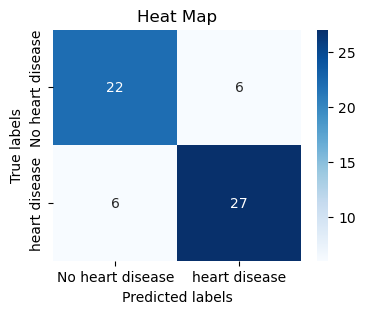

Precision score= 81.818 %
Recall score= 81.818 %
F1 score= 81.818 %
Sensitivity= 78.57 %
Specificity= 81.82 %


In [37]:
compare_model_cm(LogisticRegression(max_iter=1000))

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prediction=rfc_classifier.predict(x_test)

precision=precision_score(y_test,prediction)
recall=recall_score(y_test,prediction)
f1=f1_score(y_test,prediction)
print(precision,recall,f1)

0.78125 0.7575757575757576 0.7692307692307692


### Correlation Matrix

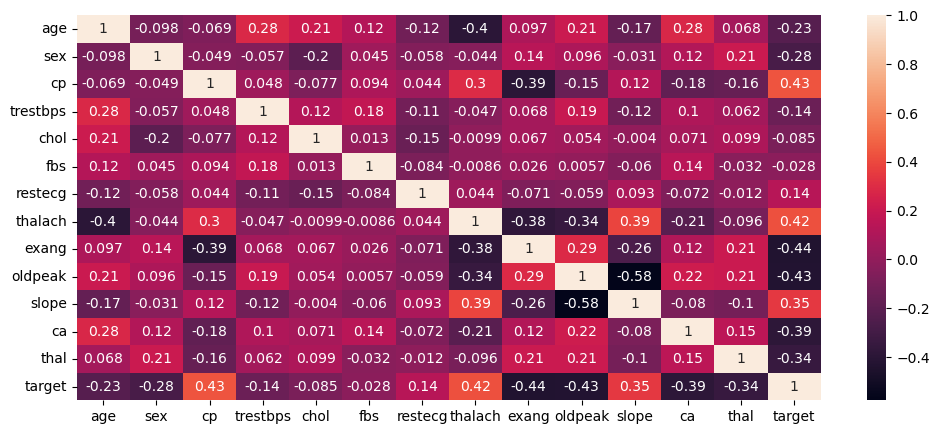

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(heart_data.corr(),annot=True)
plt.show()